In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE, SelectKBest, f_classif
from sklearn.metrics import confusion_matrix

# Introduction

Today's dataset comes from the UCI Machine Learning Repository and is a set of data on [Online News Popularity](http://archive.ics.uci.edu/ml/datasets/Online+News+Popularity) for articles shared on Mashable.

The dataset can be found in this repository (`datasets/OnlineNewsPopularity.csv`) and the codebook can be found within the `datasets` folder as well (or online [here](https://git.generalassemb.ly/DSI-EAST-1/lab-feature-selection-grid-search/blob/master/datasets/OnlineNewsPopularity.names).) However, you will not need to have intimate domain knowledge to create a great model!

## Question 1: EDA

For this step, do the following:
- Import the data in `datasets/OnlineNewsPopularity.csv`
- Use methods like `.describe()` and `.info()` to identify if there is any missing data and any non-numeric data
- Print out the results of `df.columns` -- are these names formatted correctly?
- Drop any columns that do not contain numeric values
- Drop or impute any missing data
- Recode the `shares` column (your target) to be 1 if shares is >= 1500 and 0 otherwise

In [2]:
df = pd.read_csv('datasets/OnlineNewsPopularity.csv')

In [3]:
df.describe()

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
count,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,...,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000
mean,354.530471,10.398749,546.514731,0.548216,0.996469,0.689175,10.883690,3.293638,4.544143,1.249874,...,0.095446,0.756728,-0.259524,-0.521944,-0.107500,0.282353,0.071425,0.341843,0.156064,3395.380184
std,214.163767,2.114037,471.107508,3.520708,5.231231,3.264816,11.332017,3.855141,8.309434,4.107855,...,0.071315,0.247786,0.127726,0.290290,0.095373,0.324247,0.265450,0.188791,0.226294,11626.950749
min,8.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000,1.000000
25%,164.000000,9.000000,246.000000,0.470870,1.000000,0.625739,4.000000,1.000000,1.000000,0.000000,...,0.050000,0.600000,-0.328383,-0.700000,-0.125000,0.000000,0.000000,0.166667,0.000000,946.000000
50%,339.000000,10.000000,409.000000,0.539226,1.000000,0.690476,8.000000,3.000000,1.000000,0.000000,...,0.100000,0.800000,-0.253333,-0.500000,-0.100000,0.150000,0.000000,0.500000,0.000000,1400.000000
75%,542.000000,12.000000,716.000000,0.608696,1.000000,0.754630,14.000000,4.000000,4.000000,1.000000,...,0.100000,1.000000,-0.186905,-0.300000,-0.050000,0.500000,0.150000,0.500000,0.250000,2800.000000
max,731.000000,23.000000,8474.000000,701.000000,1042.000000,650.000000,304.000000,116.000000,128.000000,91.000000,...,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.500000,1.000000,843300.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39644 entries, 0 to 39643
Data columns (total 61 columns):
url                               39644 non-null object
 timedelta                        39644 non-null float64
 n_tokens_title                   39644 non-null float64
 n_tokens_content                 39644 non-null float64
 n_unique_tokens                  39644 non-null float64
 n_non_stop_words                 39644 non-null float64
 n_non_stop_unique_tokens         39644 non-null float64
 num_hrefs                        39644 non-null float64
 num_self_hrefs                   39644 non-null float64
 num_imgs                         39644 non-null float64
 num_videos                       39644 non-null float64
 average_token_length             39644 non-null float64
 num_keywords                     39644 non-null float64
 data_channel_is_lifestyle        39644 non-null float64
 data_channel_is_entertainment    39644 non-null float64
 data_channel_is_bus              396

In [5]:
df.isnull().sum().sum()

0

```
Instructor answer:

Does not appear to be any missing data so we will go onto the required data transformation
```

In [6]:
df.columns

Index(['url', ' timedelta', ' n_tokens_title', ' n_tokens_content',
       ' n_unique_tokens', ' n_non_stop_words', ' n_non_stop_unique_tokens',
       ' num_hrefs', ' num_self_hrefs', ' num_imgs', ' num_videos',
       ' average_token_length', ' num_keywords', ' data_channel_is_lifestyle',
       ' data_channel_is_entertainment', ' data_channel_is_bus',
       ' data_channel_is_socmed', ' data_channel_is_tech',
       ' data_channel_is_world', ' kw_min_min', ' kw_max_min', ' kw_avg_min',
       ' kw_min_max', ' kw_max_max', ' kw_avg_max', ' kw_min_avg',
       ' kw_max_avg', ' kw_avg_avg', ' self_reference_min_shares',
       ' self_reference_max_shares', ' self_reference_avg_sharess',
       ' weekday_is_monday', ' weekday_is_tuesday', ' weekday_is_wednesday',
       ' weekday_is_thursday', ' weekday_is_friday', ' weekday_is_saturday',
       ' weekday_is_sunday', ' is_weekend', ' LDA_00', ' LDA_01', ' LDA_02',
       ' LDA_03', ' LDA_04', ' global_subjectivity',
       ' global_sent

In [7]:
df.columns = [col.strip() for col in df.columns]

In [8]:
df = df[[col for col in df.columns if col != 'url']]
df['shares'] = df['shares'].apply(lambda x: 1 if x >= 1500 else 0)

In [9]:
df.head()

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,0.0,...,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,0
1,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,0.0,...,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,0
2,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,0.0,...,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1
3,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,0.0,...,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,0
4,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,0.0,...,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,0


## Question 2: Correlation Table

Use Seaborn and pandas to create a correlation heatmap. What patterns are apparent to you? Is this easy to use or too cluttered to make sense of?

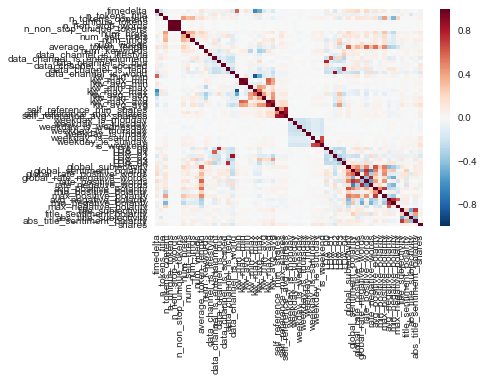

In [11]:
sns.heatmap(df.corr())

```
Instructor answer:

Many of the columns do have patches of correlation, however nothing seems strongly correlated with shares. The plot is also pretty difficult to make sense of. We may want to approach this without the heatmap as well:
```


In [12]:
df.corr()['shares'].apply(lambda x: abs(x)).sort_values(ascending=False).head(25)

shares                           1.000000
kw_avg_avg                       0.162057
LDA_02                           0.156471
data_channel_is_world            0.150726
is_weekend                       0.137616
data_channel_is_entertainment    0.110558
data_channel_is_socmed           0.110144
weekday_is_saturday              0.106713
data_channel_is_tech             0.095336
kw_min_avg                       0.092386
num_hrefs                        0.088362
LDA_04                           0.087811
weekday_is_sunday                0.081684
LDA_01                           0.075640
kw_max_avg                       0.074773
num_keywords                     0.069840
global_sentiment_polarity        0.069656
global_subjectivity              0.067527
rate_negative_words              0.067057
num_imgs                         0.067000
LDA_00                           0.064819
self_reference_avg_sharess       0.063238
LDA_03                           0.061998
global_rate_positive_words       0

## 3. Train-test split

Split your data frame into your target (the `shares` column) and your features (all other columns), then split those into a training and holdout (test) set. You will not use this holdout set until the end of the lab. 

Your test size should be `0.33` and should use the random seed `20170825`.

In [15]:
y = df['shares'].copy()
X = df[[col for col in df.columns if col != 'shares']].copy()

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                   test_size=0.33,
                                                    random_state=20170825)

In [16]:
print(X_train.shape, X_test.shape)

(26561, 59) (13083, 59)


## 4. Feature Selection through Regularization

Use a Lasso Logistic Regression to decide on a set of features to select. 

1. Standardize your training dataset.
2. Fit three lasso logistic regressions with `C` of 0.1, 1.0, and 10.0. Double check with the documentation to ensure that you are fitting **Lasso** logistic regressions.
3. Identify which columns have zero coefficients. 
4. What trends do you see? Are there any features that seem like strong contenders to be put in the model? 
    > If there are no trends yet, no worries! We're going to try other feature selection techniques as well.

In [18]:
ss = StandardScaler()
ss.fit(X_train)
X_train_std = ss.transform(X_train)

In [21]:
# Fitting lasso 1 with C=0.1

lr_01 = LogisticRegression(penalty='l1', C=0.1)
lr_01.fit(X_train_std, y_train)

LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [22]:
# Fitting lasso 2 with C=1.0

lr_1 = LogisticRegression(penalty='l1', C=1.0)
lr_1.fit(X_train_std, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [23]:
# Fitting lasso 3 with C=10.0

lr_10 = LogisticRegression(penalty='l1', C=10.0)
lr_10.fit(X_train_std, y_train)

LogisticRegression(C=10.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [37]:
# Identify which columns each version suggests you should drop

for model_name, model in zip(['C=0.1', 'C=1.0', 'C=10.0'], [lr_01, lr_1, lr_10]):
    print(model_name)
    for col, coef in zip(X_train.columns, model.coef_[0]):
        if coef == 0.0:
            print('Drop', col, coef)
    print('\n')

C=0.1
Drop weekday_is_thursday 0.0
Drop weekday_is_sunday 0.0
Drop LDA_03 0.0
Drop global_rate_negative_words 0.0
Drop rate_negative_words 0.0
Drop min_negative_polarity 0.0


C=1.0
Drop n_unique_tokens 0.0
Drop n_non_stop_words 0.0
Drop LDA_01 0.0


C=10.0




```
Instructor answer: 

Doesn't look like there is much of a trend. We'll hold onto these and try some other techniques.
```

## 5. Feature Selection with RFE

Use Recursive Feature Elimination and a new Logistic Regression object to do feature selection.

1. Instantiate an `RFE` object, set to cut down your input features to 50% of the input, as well as a `LogisticRegression` object.
2. Fit your `RFE` object to your standardized features in your training set. 
3. What features does RFE suggest to drop? Are there any similarities to those features dropped by regularization?
    > Remember that after fitting, `RFE.support_` gives you a mask of columns, where columns marked `True` are going to be kept and columns marked `False` should be dropped.

In [40]:
lr = LogisticRegression()
rfe = RFE(lr, verbose=2)

In [41]:
rfe.fit(X_train_std, y_train)

Fitting estimator with 59 features.
Fitting estimator with 58 features.
Fitting estimator with 57 features.
Fitting estimator with 56 features.
Fitting estimator with 55 features.
Fitting estimator with 54 features.
Fitting estimator with 53 features.
Fitting estimator with 52 features.
Fitting estimator with 51 features.
Fitting estimator with 50 features.
Fitting estimator with 49 features.
Fitting estimator with 48 features.
Fitting estimator with 47 features.
Fitting estimator with 46 features.
Fitting estimator with 45 features.
Fitting estimator with 44 features.
Fitting estimator with 43 features.
Fitting estimator with 42 features.
Fitting estimator with 41 features.
Fitting estimator with 40 features.
Fitting estimator with 39 features.
Fitting estimator with 38 features.
Fitting estimator with 37 features.
Fitting estimator with 36 features.
Fitting estimator with 35 features.
Fitting estimator with 34 features.
Fitting estimator with 33 features.
Fitting estimator with 32 fe

RFE(estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
  n_features_to_select=None, step=1, verbose=2)

In [42]:
for col, keep in zip(X_train.columns, rfe.support_):
    if keep == False:
        print(col, 'dropped!')

timedelta dropped!
n_tokens_title dropped!
n_unique_tokens dropped!
num_imgs dropped!
num_videos dropped!
data_channel_is_lifestyle dropped!
data_channel_is_world dropped!
kw_min_max dropped!
kw_max_max dropped!
self_reference_min_shares dropped!
self_reference_max_shares dropped!
weekday_is_monday dropped!
weekday_is_tuesday dropped!
weekday_is_wednesday dropped!
weekday_is_thursday dropped!
weekday_is_friday dropped!
LDA_04 dropped!
global_sentiment_polarity dropped!
global_rate_positive_words dropped!
global_rate_negative_words dropped!
avg_positive_polarity dropped!
min_positive_polarity dropped!
max_positive_polarity dropped!
avg_negative_polarity dropped!
min_negative_polarity dropped!
max_negative_polarity dropped!
title_subjectivity dropped!
title_sentiment_polarity dropped!
abs_title_subjectivity dropped!
abs_title_sentiment_polarity dropped!


```
Instructor answer: 

There are some similarities here, but RFE has seemed to grab different columns generally than regularization
```

## 6. Feature Selection with SelectKBest

Use SelectKBest and `f_classif` to select the top 30 features

1. Instantiate a SelectKBest, using a `score_func` of `f_classif` and a `k` of 30
    > Note, `f_classif` needs to be imported as well! 
2. Fit SelectKBest to your standardized features in the training set.
3. Print out which columns are dropped in this case.
4. Pick a set of columns (such as `LDA`, `polarity`, `weekday`, or `data_channel` -- are any columns that have been consistently dropped? 
    > Remember that after fitting, `SelectKBest.get_support()` gives you a mask of columns, where columns marked `True` are going to be kept and columns marked `False` should be dropped.

In [43]:
selectkbest = SelectKBest(f_classif, k=30)

In [44]:
selectkbest.fit(X_train_std, y_train)

SelectKBest(k=30, score_func=<function f_classif at 0x11f113e18>)

In [46]:
for col, keep in zip(X_train.columns, selectkbest.get_support()):
    if keep == False:
        print(col, 'dropped!')

timedelta dropped!
n_tokens_title dropped!
n_non_stop_words dropped!
num_self_hrefs dropped!
num_videos dropped!
average_token_length dropped!
data_channel_is_lifestyle dropped!
data_channel_is_bus dropped!
kw_max_min dropped!
kw_avg_min dropped!
kw_min_max dropped!
kw_max_max dropped!
kw_avg_max dropped!
weekday_is_monday dropped!
weekday_is_tuesday dropped!
weekday_is_wednesday dropped!
weekday_is_thursday dropped!
weekday_is_friday dropped!
global_rate_negative_words dropped!
rate_positive_words dropped!
avg_positive_polarity dropped!
min_positive_polarity dropped!
max_positive_polarity dropped!
avg_negative_polarity dropped!
min_negative_polarity dropped!
max_negative_polarity dropped!
title_subjectivity dropped!
abs_title_subjectivity dropped!
abs_title_sentiment_polarity dropped!


```
Instructor answer: 

Generally, it looks like a lot of the polarity features as well as the weekday dummies seem not useful and have been frequently dropped.
```

## 7. Choosing a Feature Set

1. Choose a set of features to keep:
     - Features with non-zero coefficients from regularization
     - Features kept by RFE
     - Features kept by SelectKBest
2. Create a new version of your training and holdout features. Drop the columns you will not be keeping from these new versions of your training and holdout features. **Do not overwrite your original training and holdout features** -- we will use those shortly.  Print out the shapes to ensure that you have successfully dropped those columns. 
    > Remember that both `RFE` and `SelectKBest` give you a mask of columns to keep and that those columns are in the same order in both your training and holdout sets!
3. Create a correlation heatmap with your reduced feature set. Do you see any patterns? What type of features seem important? Do they relate to each other?

```
Instructor answer: 

RFE and SelectKBest give us very similar answers in this case, suggesting that either one probably have good reasons to be used. Regularization seems like it did not drop many columns here, but may be a good starting off place if we want to be more conservative. However, for our purposes, we can afford to be more dramatic in which ones we cut. 

I'll choose RFE, though in this case, the results are very similar.
```

In [48]:
X_train_fs = X_train.iloc[:, rfe.support_] # _fs for feature-selected
X_test_fs = X_test.iloc[:, rfe.support_]
print(X_train_fs.shape, X_test_fs.shape)

(26561, 29) (13083, 29)


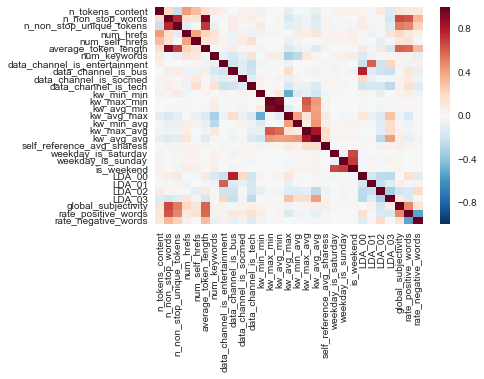

In [49]:
sns.heatmap(X_train_fs.corr())

```

Instructor answer:

Looks like weekend posting, the length of the article, certain types of articles, the positivity, and certain LDAs count.
```

## 8. Hyperparameter Optimization with GridSearch

Fit three logistic regressions on your training set, with the following parameters:

1. A logistic regression with the default hyperparameters, with all features.
2. A logistic regression with the default hyperparameters, with only the features you selected in question 7.
3. A logistic regression using `GridSearchCV` to optimize the following hyperparameters, with only the features you selected in question 7. Print out the hyperparameters selected by `GridSearchCV`
  - `penalty`: should we use l1 or l2 regularization?
  - `C`: how strong should our regularization be?
4. Score each of your fit models against the holdout set. Which model does the best?
5. Print out a confusion matrix for each model. Are there any trends that you see?

In [50]:
lr_all_features = LogisticRegression()
lr_all_features.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [56]:
lr_selected_features = LogisticRegression()
lr_selected_features.fit(X_train_fs, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [57]:
params = {
    'penalty': ['l1', 'l2'],
    'C': np.linspace(0.01, 0.99, 10)
}

grid_search = GridSearchCV(LogisticRegression(),
                          params,
                          verbose=2,
                          n_jobs=-1)

grid_search.fit(X_train_fs, y_train)
print(grid_search.best_params_)
lr_hyperparams = grid_search.best_estimator_

Fitting 3 folds for each of 20 candidates, totalling 60 fits
[CV] C=0.01, penalty=l1 ..............................................
[CV] C=0.01, penalty=l1 ..............................................
[CV] C=0.01, penalty=l1 ..............................................
[CV] C=0.01, penalty=l2 ..............................................
[CV] ............................... C=0.01, penalty=l1, total=   0.8s
[CV] C=0.01, penalty=l2 ..............................................
[CV] ............................... C=0.01, penalty=l1, total=   1.0s
[CV] C=0.01, penalty=l2 ..............................................
[CV] ............................... C=0.01, penalty=l1, total=   1.2s
[CV] C=0.118888888889, penalty=l1 ....................................
[CV] ............................... C=0.01, penalty=l2, total=   1.8s
[CV] C=0.118888888889, penalty=l1 ....................................
[CV] ..................... C=0.118888888889, penalty=l1, total=   1.7s
[CV] C=0.1188888

[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   19.8s


[CV] ..................... C=0.554444444444, penalty=l2, total=   2.1s
[CV] C=0.663333333333, penalty=l1 ....................................
[CV] ..................... C=0.554444444444, penalty=l1, total=   3.7s
[CV] C=0.663333333333, penalty=l1 ....................................
[CV] ..................... C=0.663333333333, penalty=l1, total=   2.0s
[CV] C=0.663333333333, penalty=l2 ....................................
[CV] ..................... C=0.554444444444, penalty=l2, total=   2.6s
[CV] C=0.663333333333, penalty=l2 ....................................
[CV] ..................... C=0.663333333333, penalty=l1, total=   2.5s
[CV] C=0.663333333333, penalty=l2 ....................................
[CV] ..................... C=0.663333333333, penalty=l2, total=   2.1s
[CV] C=0.772222222222, penalty=l1 ....................................
[CV] ..................... C=0.663333333333, penalty=l2, total=   1.8s
[CV] C=0.772222222222, penalty=l1 ....................................
[CV] .

[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:   38.1s finished


{'C': 0.33666666666666667, 'penalty': 'l1'}


In [58]:
print('All features:', lr_all_features.score(X_test, y_test))
print('Selected features:', lr_selected_features.score(X_test_fs, y_test))
print('Selected features, grid search:', lr_hyperparams.score(X_test_fs, y_test))

All features:  0.594206221815
Selected features: 0.635022548345
Selected features, grid search: 0.644041886417


In [63]:
all_features_pred = lr_all_features.predict(X_test)
select_features_pred = lr_selected_features.predict(X_test_fs)
select_features_hyper_pred = lr_hyperparams.predict(X_test_fs)

def confusion_matrix_maker(pred_vals):
    conmat = confusion_matrix(pred_vals, y_test)
    conmat_df = pd.DataFrame(conmat, 
                             columns=['Pred=0', 'Pred=1'],
                             index=['Actual=0', 'Actual=1'])
    return conmat_df
    
print(confusion_matrix_maker(all_features_pred))
print(confusion_matrix_maker(select_features_pred))
print(confusion_matrix_maker(select_features_hyper_pred))

          Pred=0  Pred=1
Actual=0    4327    3021
Actual=1    2288    3447
          Pred=0  Pred=1
Actual=0    4387    2547
Actual=1    2228    3921
          Pred=0  Pred=1
Actual=0    4385    2427
Actual=1    2230    4041


```
Instructor response:

Looks like in my case that our predictions of class=0 have remained fairly consistent across runs. However, doing feature selection and hyperparameter optimization have helped us predict an additional 600 class=1 cases successfully!
```

## 9. _Bonus_ Continue Optimizing!

In this lab, you're not expected to complete all (or even any) of question 9. However, if you find yourself with extra time, any of these options may lead to a higher score. Modeling is complex and often has a *number* of pathways to go down. This is a small selection  of potential next steps for this dataset.

We have only scratched the surface of how to optimize a model for this dataset. With your remaining time, feel free to optimize in one of a few different ways, making sure that you are using cross-validation to check that your decisions are sound:

1. **Feature Selection**: try a model with a new set of features from the following methods:
    - A higher regularization strength for feature selection via regularization
    - A lower / higher number of features returned by `RFE` or `SelectKBest`
2. **Feature Engineering**: try a model with the following tweaks:
    - Are all the features modeled correctly? Should we create dummy variables or otherwise transform any of the current features?
    - We discarded the `url` feature very early onwards -- is there useful information we could extract from there?
    - Is our decision to predict over/under 1500 shares correct? Do EDA on the original `shares` column to identify if there is a better cutoff.
3. **Model Selection**: 
    - Try a different classification model such as _k_-Nearest Neighbors
    - Is classification even a correct choice here? Could we use a regression model to predict the actual number of shares instead?
4. **Hyperparameter Optimization**: 
    - Continue doing hyperparameter optimization through `GridSearchCV`
    - **Double Bonus**: [`RandomizedSearchCV`](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html) performs the same parametric search that `GridSearchCV` does, but over a random distribution of hyperparameters (versus user-selected ones). This can be a helpful way to start zeroing in on an area where you may want to try some more targeted grid searching
    - **Triple Bonus**: `GridSearchCV` automatically scores and ranks results based on the default scoring method in each model type ($R^2$ for `LinearRegression`, mean accuracy for `KNeighborsClassifier`, etc.) We can direct `GridSearchCV` to prioritize different metrics, however, such as precision or recall for class 1 or class 0, for example. Do some independent research on the [scoring parameter in sklearn](http://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter) and try to implement it yourself. Pick two or three metrics and optimize for each. Are the hyperparameters chosen different across each case?
    > **Note**: this is pretty advanced. Try this only if you're _exceptionally_ comfortable with the material this week.